# Jupyter notebook sample

2024-10-21 19:33:25.081058: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-21 19:33:25.083609: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-21 19:33:25.091113: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-21 19:33:25.103345: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-21 19:33:25.106831: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-21 19:33:25.116611: I tensorflow/core/platform/cpu_feature_gu

Treinando com as arquiteturas de classificação:
Comparando otimizadores para Wine Quality - Arquitetura Simples


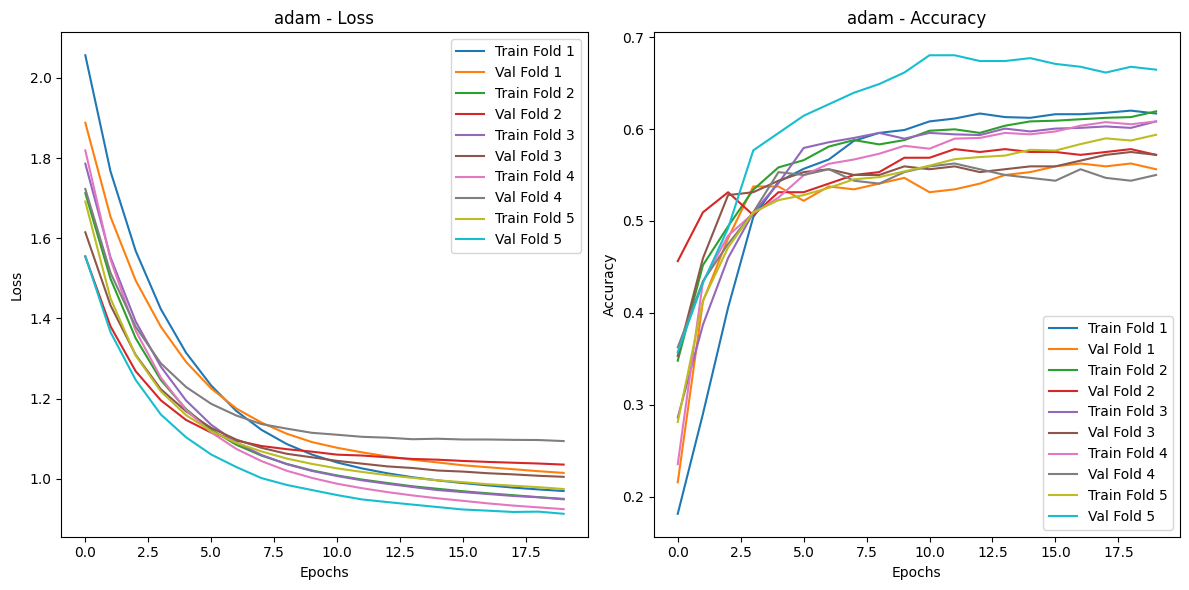

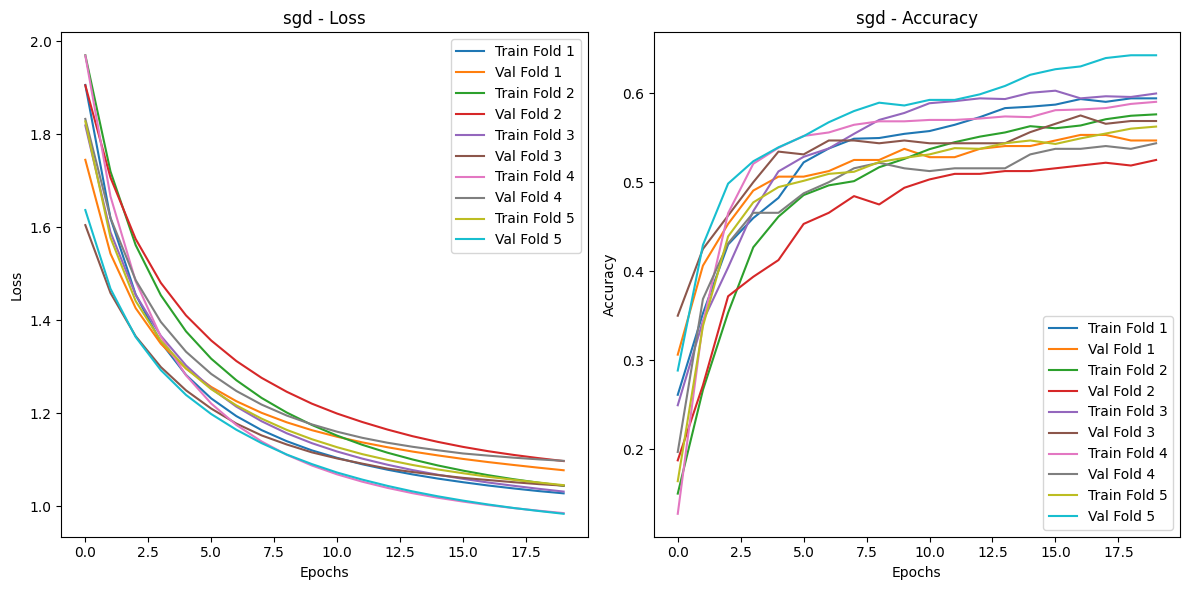

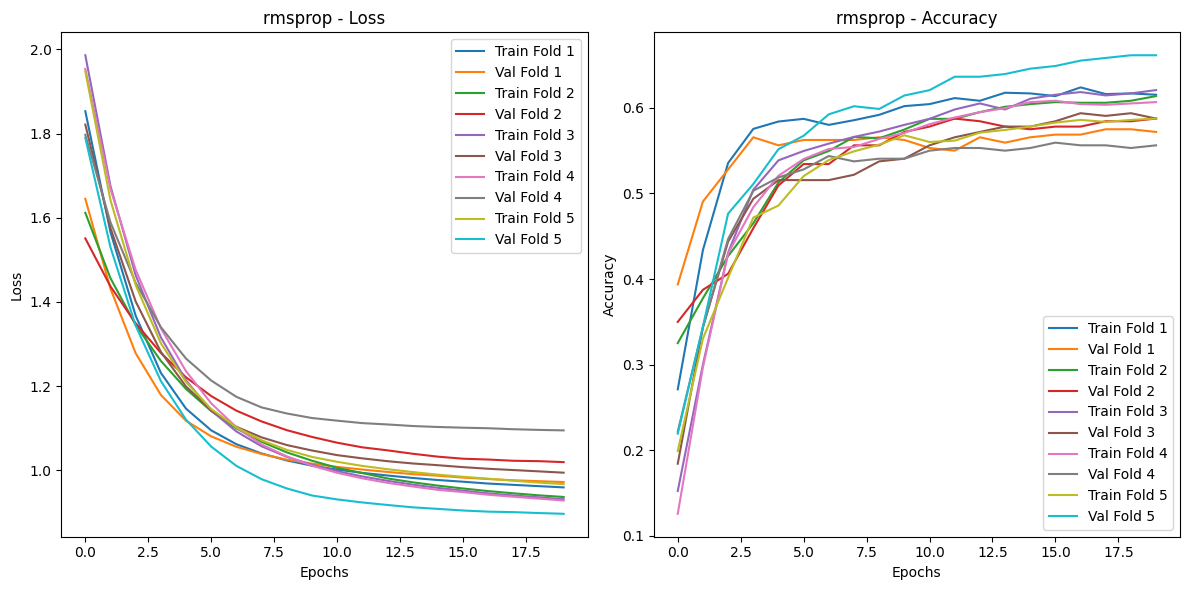

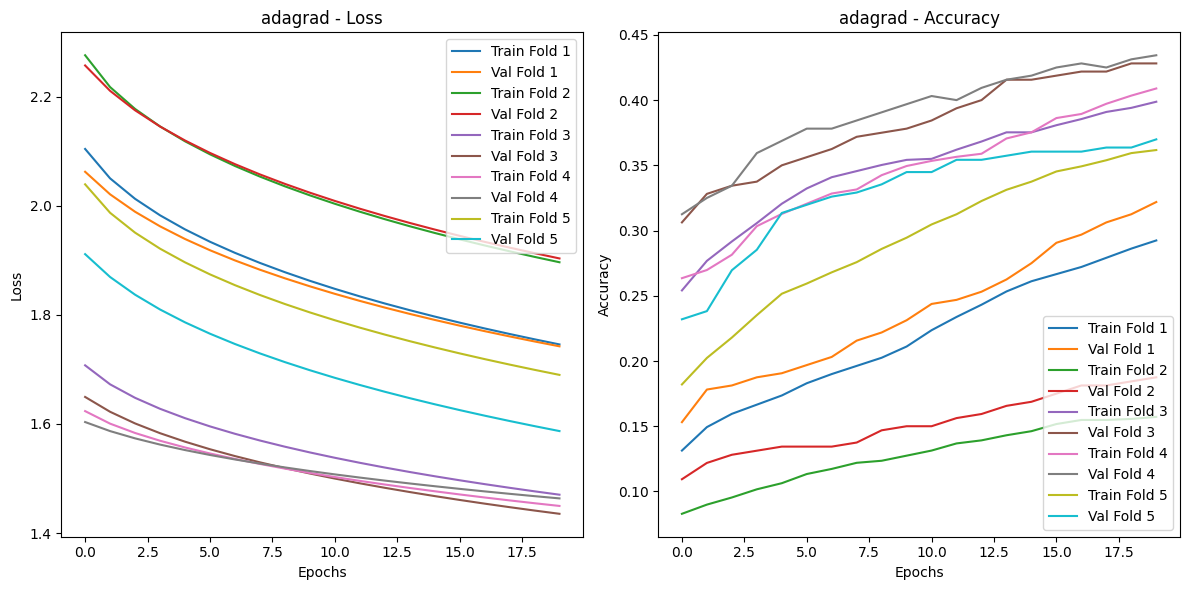

Comparando otimizadores para Wine Quality - Arquitetura Moderada


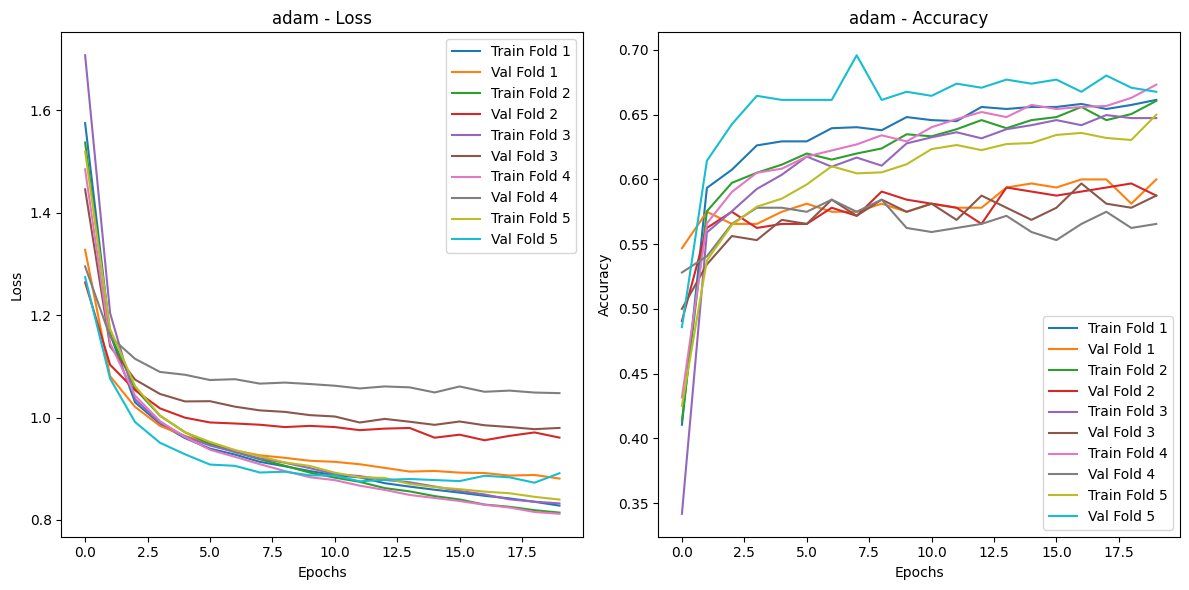

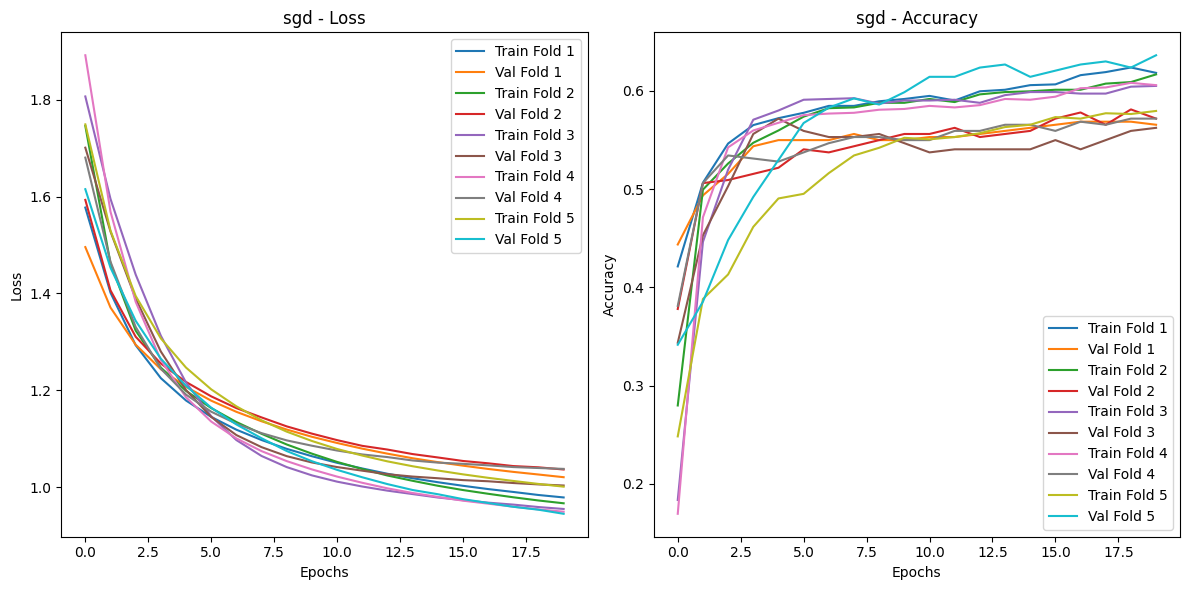

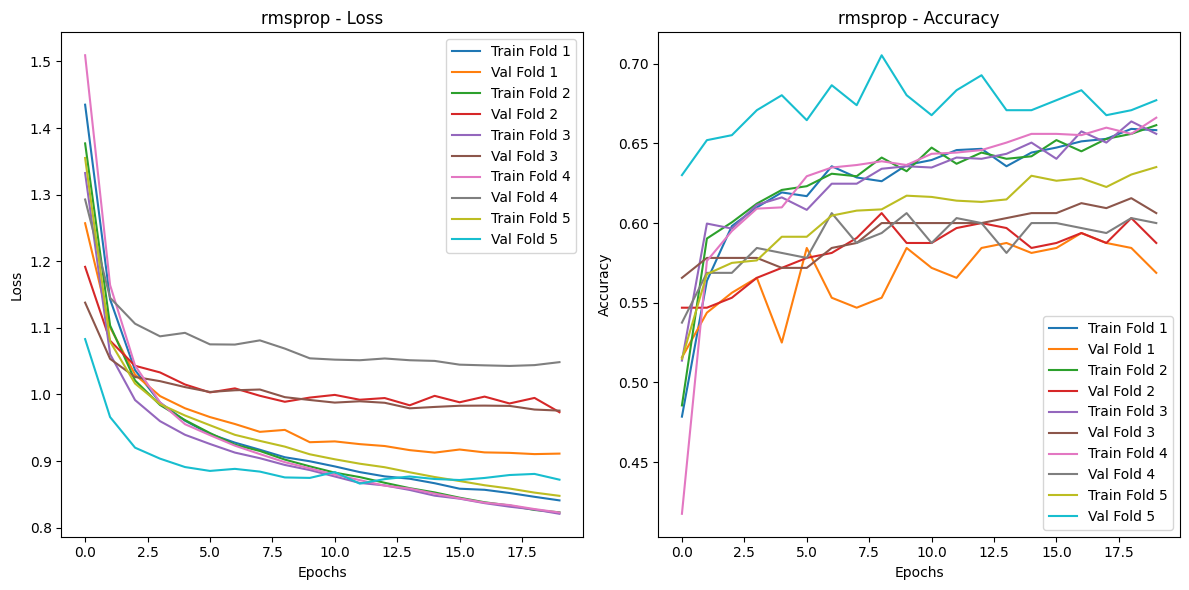

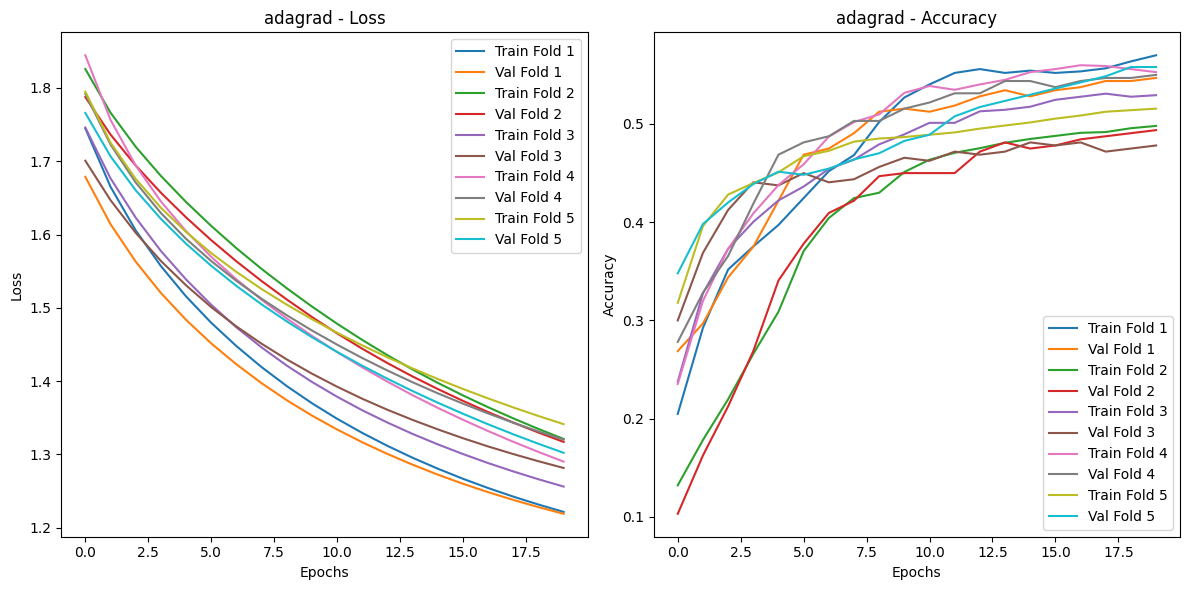

Comparando otimizadores para Wine Quality - Arquitetura Complexa


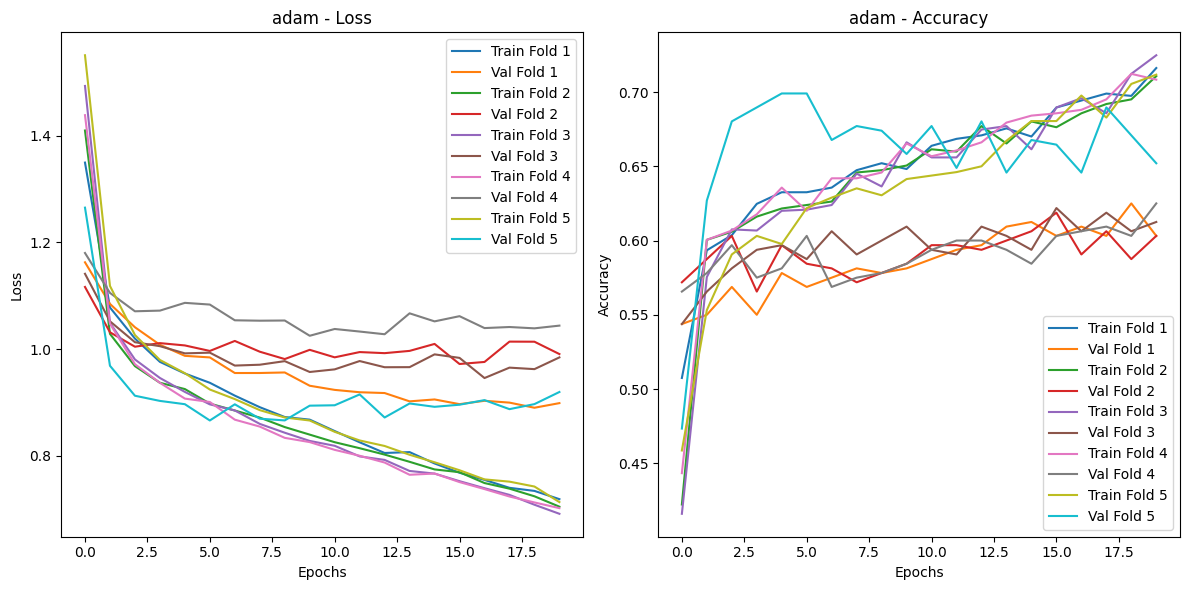

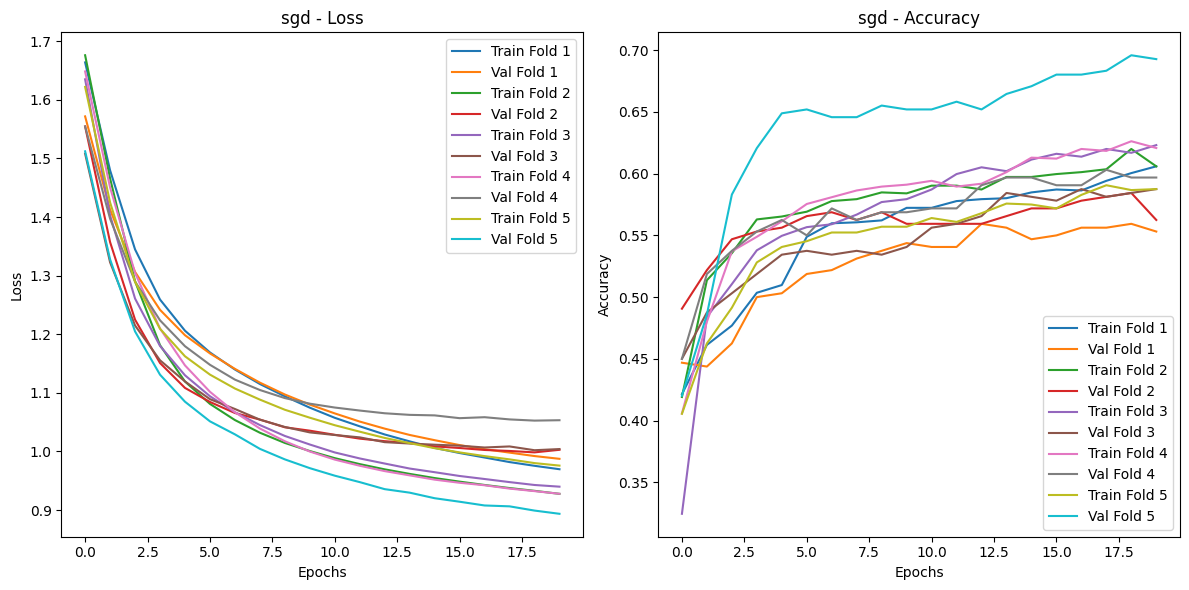

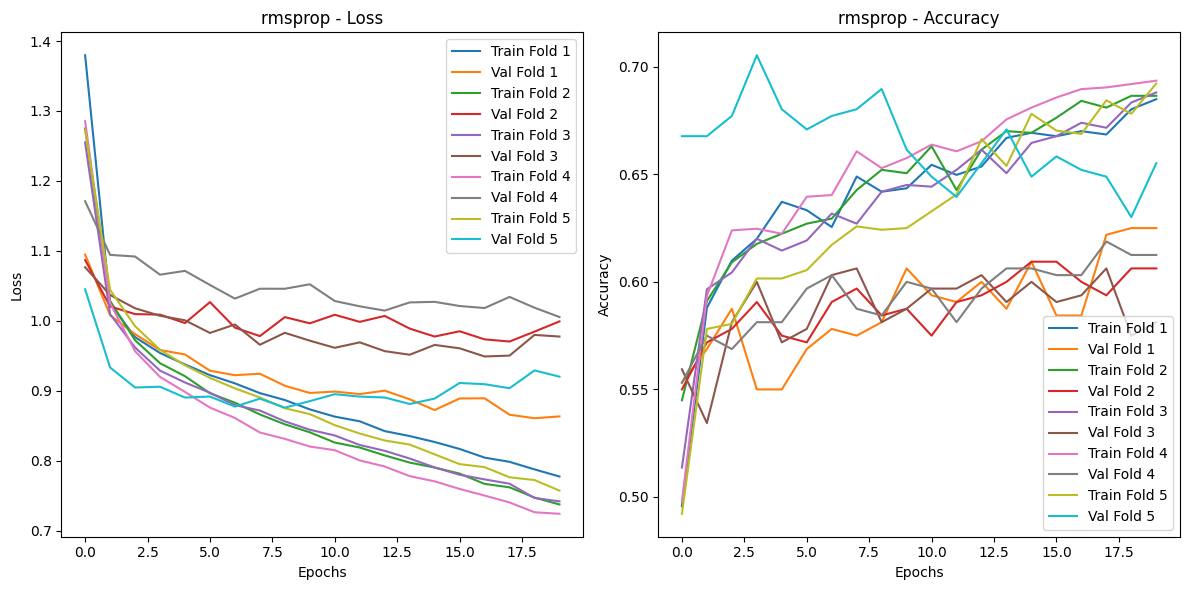

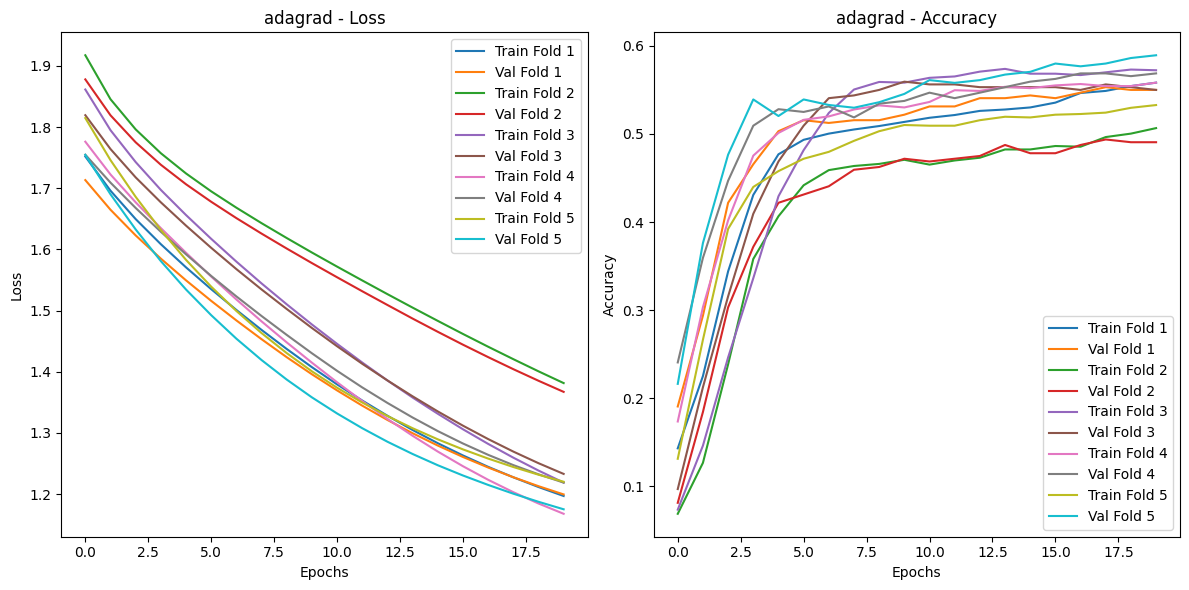

Treinando com as arquiteturas de regressão:
Comparando otimizadores para Concrete Strength - Arquitetura Simples


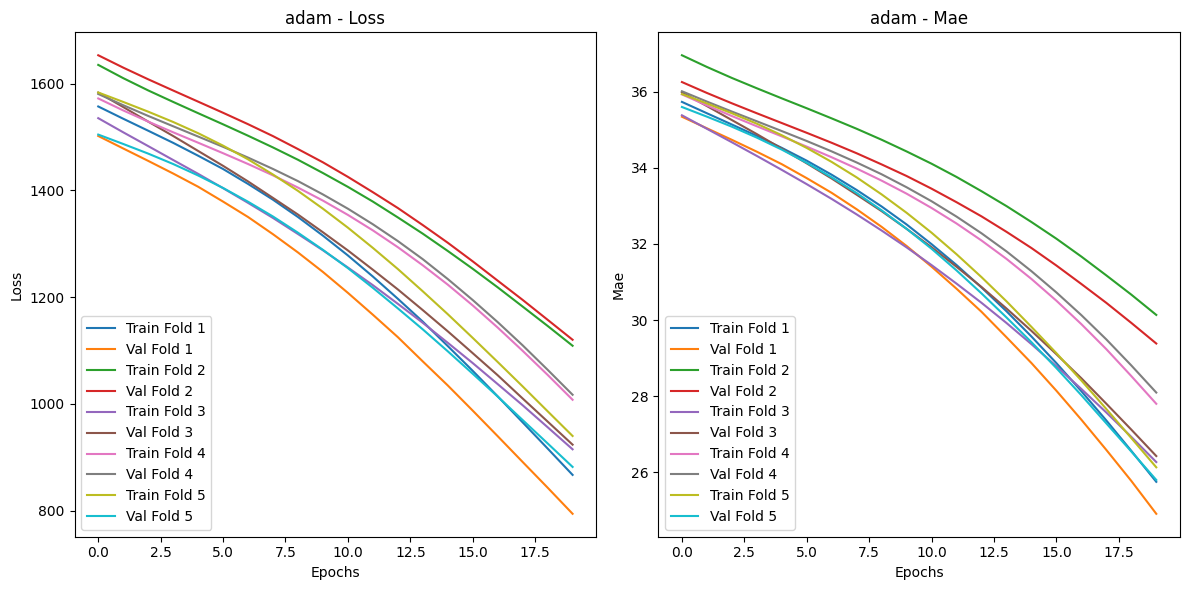

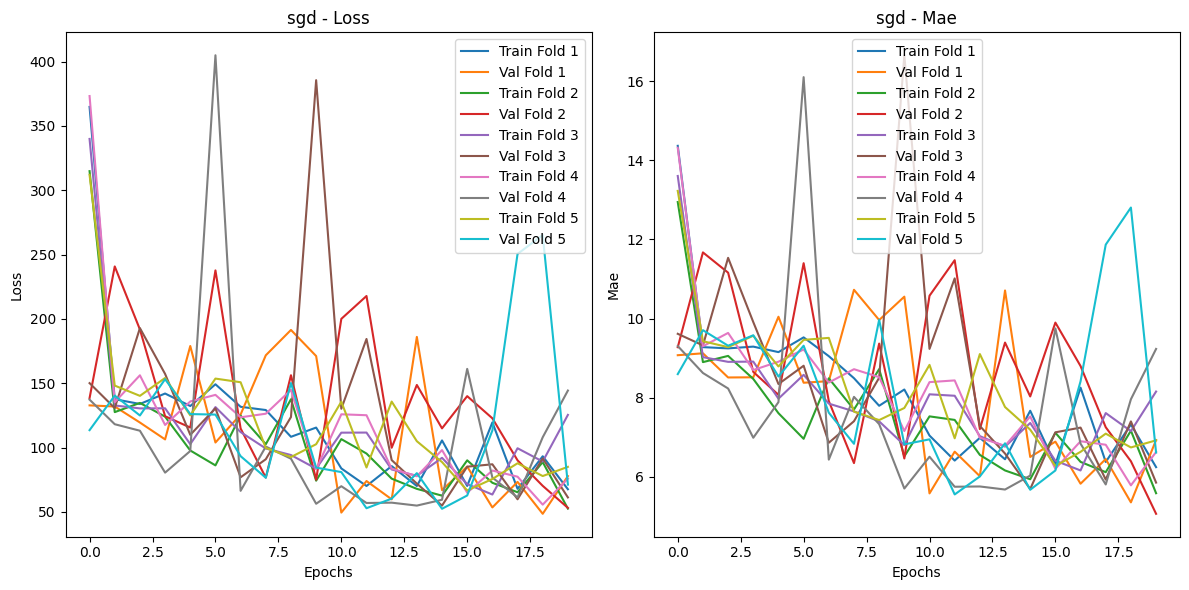

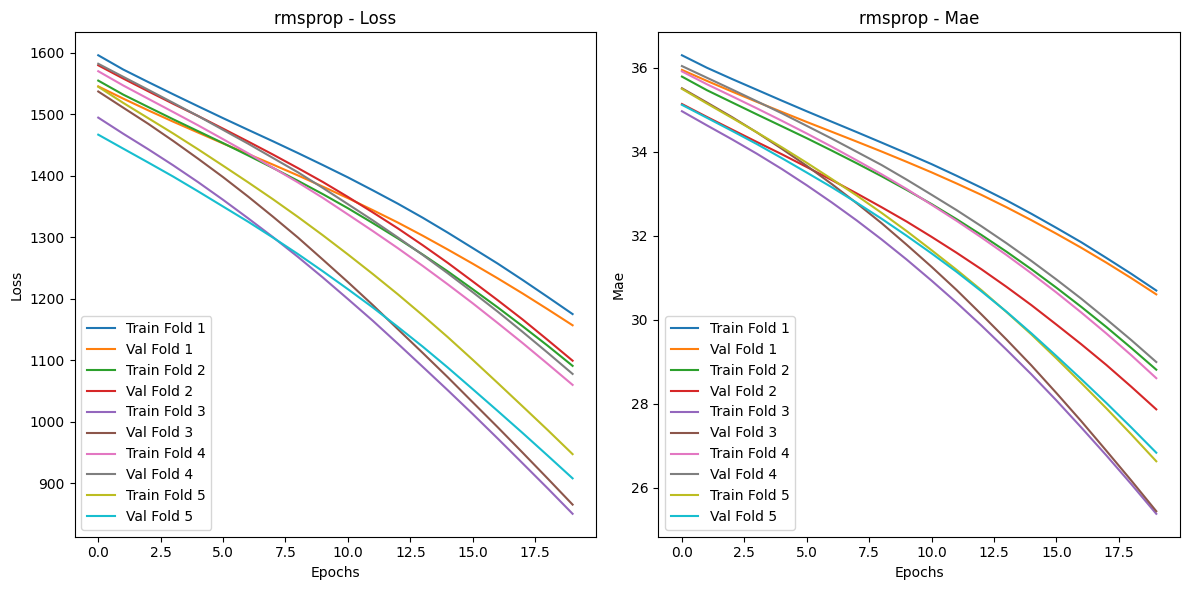

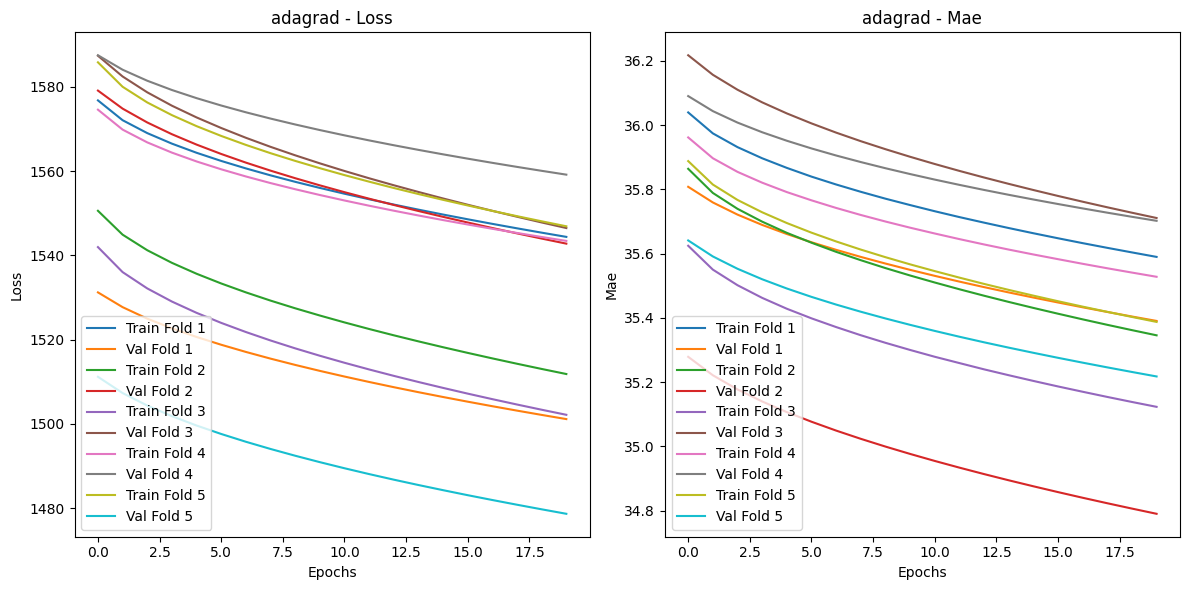

Comparando otimizadores para Concrete Strength - Arquitetura Moderada


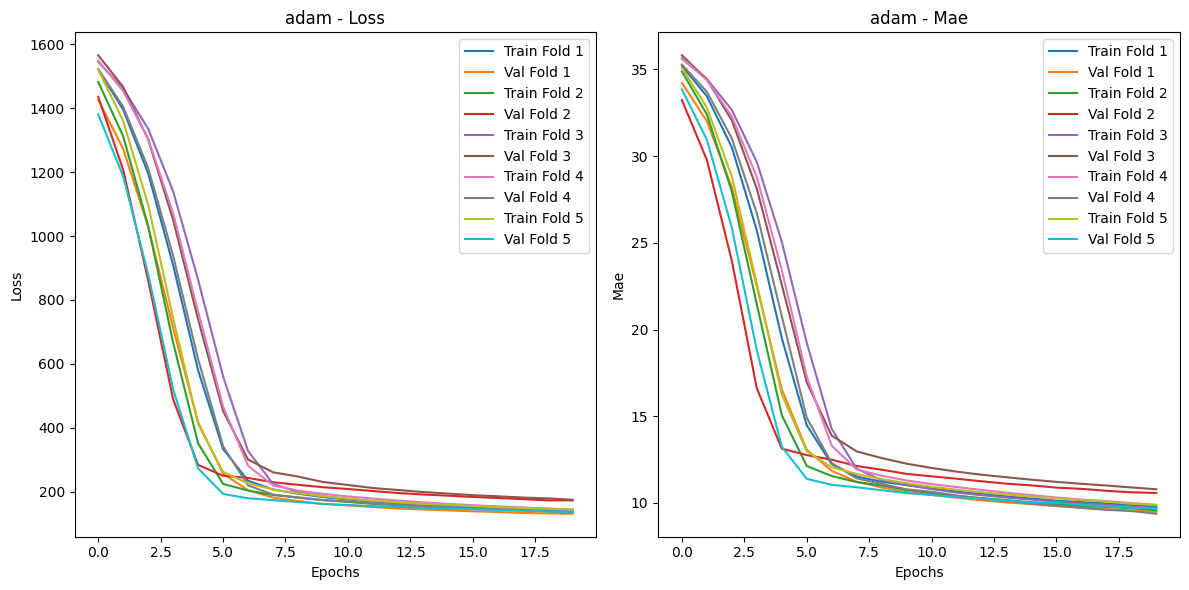

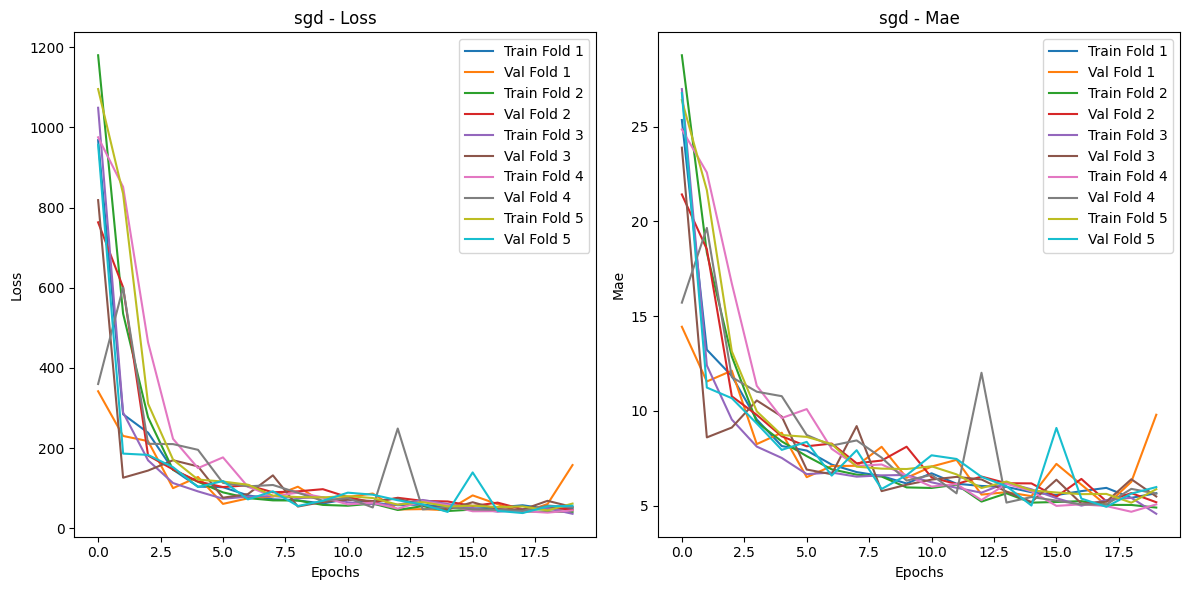

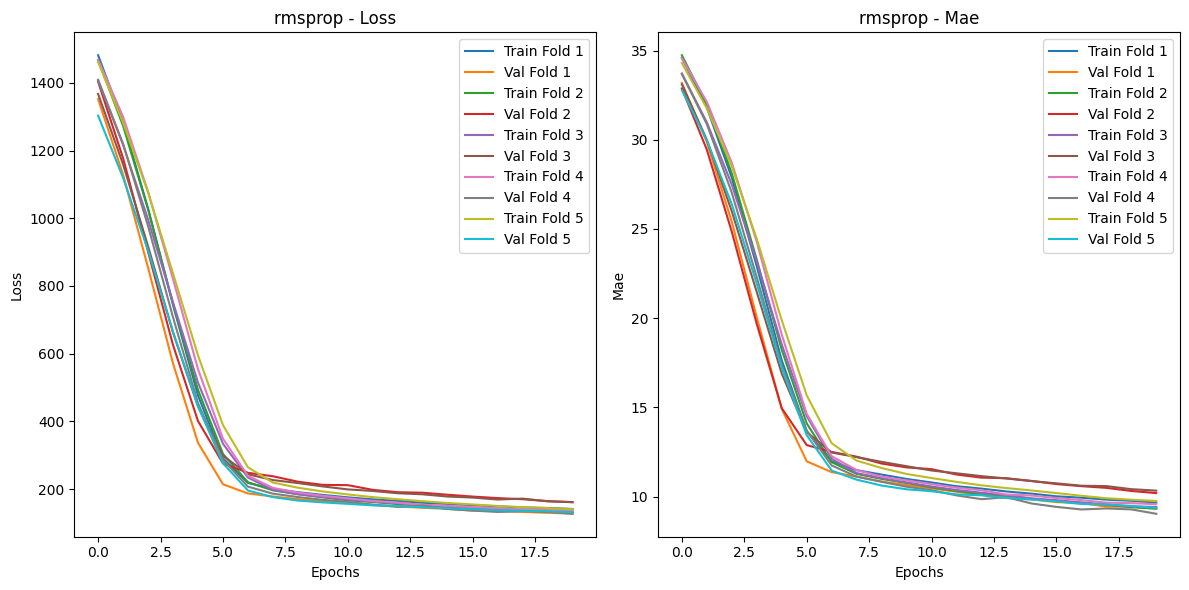

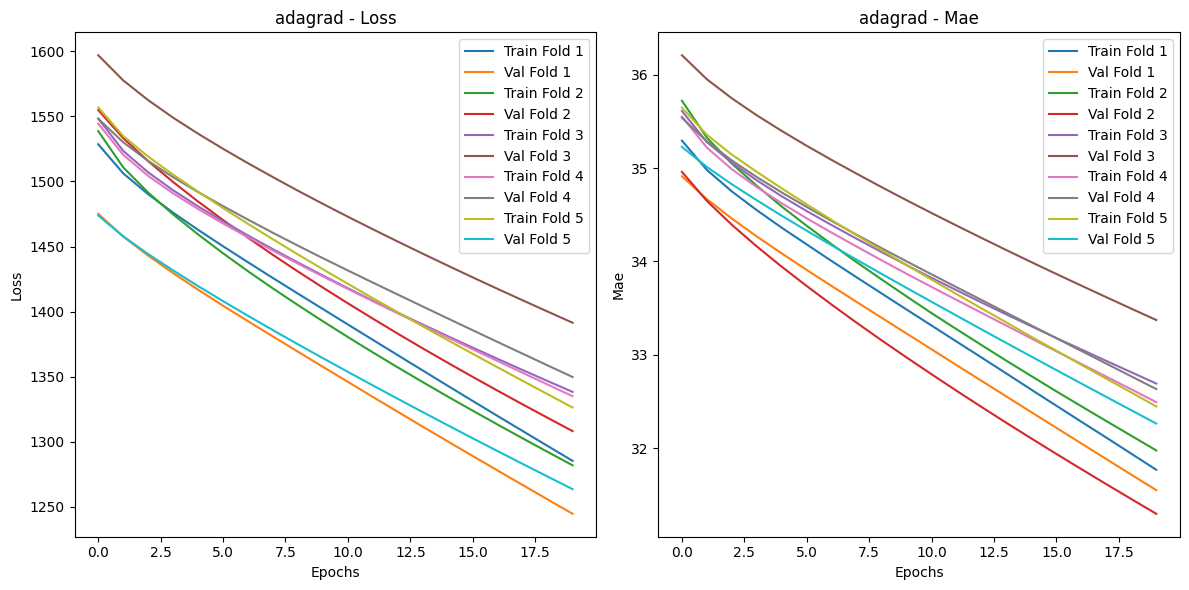

Comparando otimizadores para Concrete Strength - Arquitetura Complexa


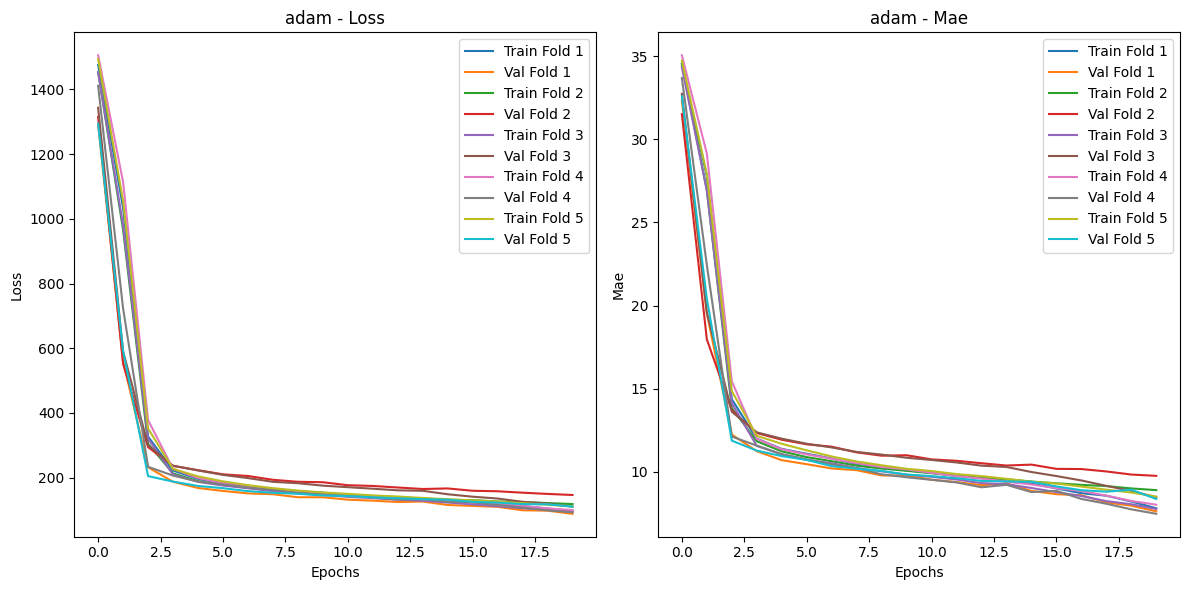

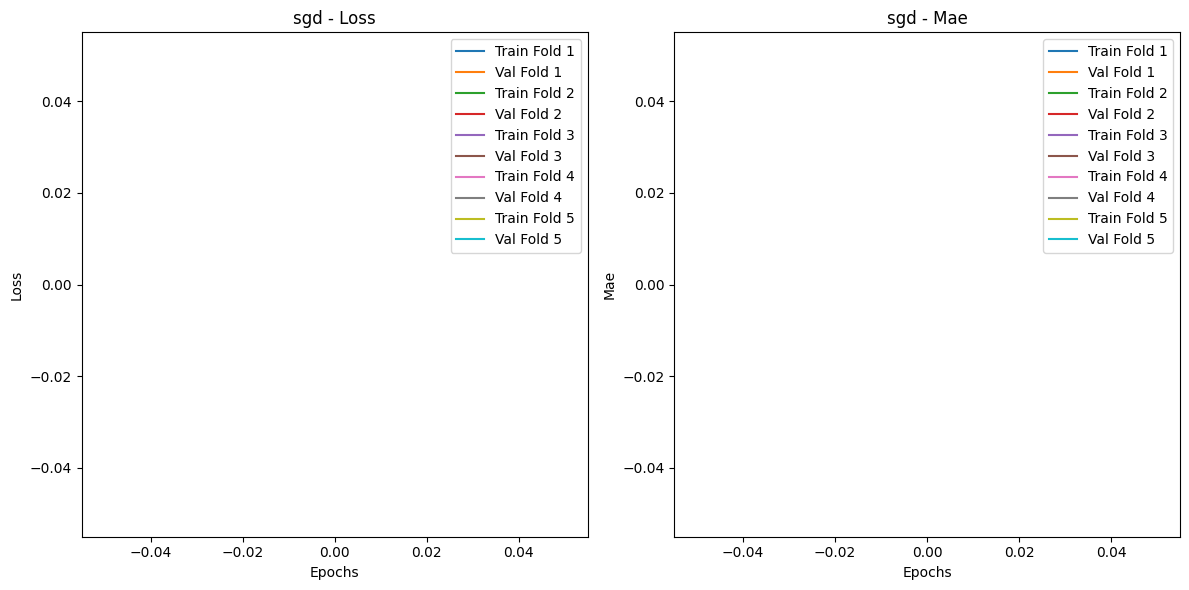

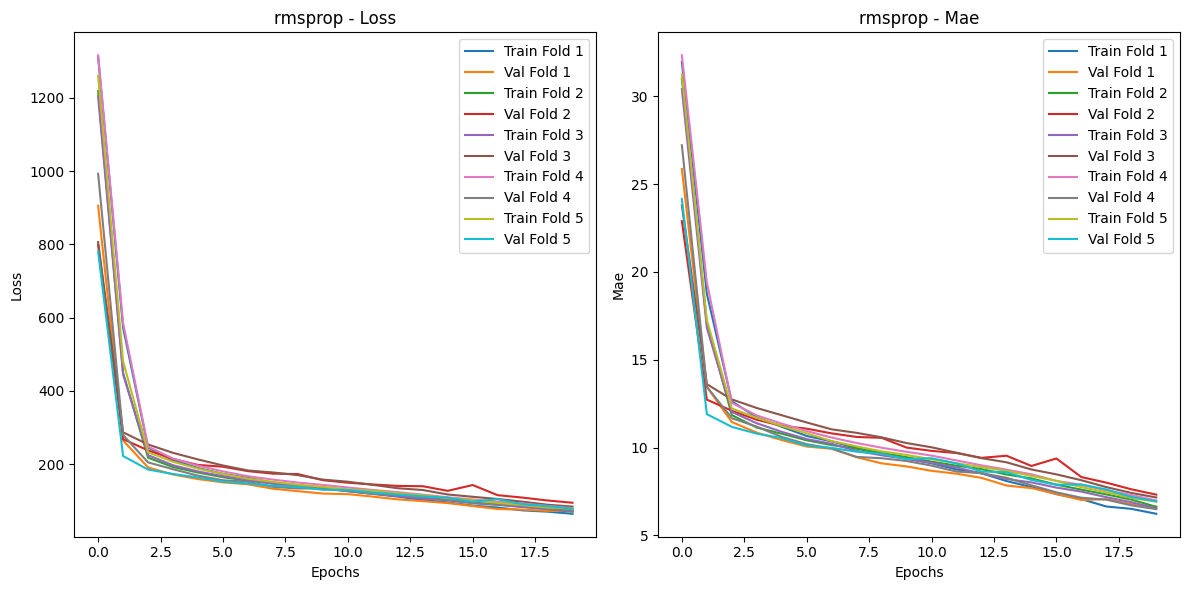

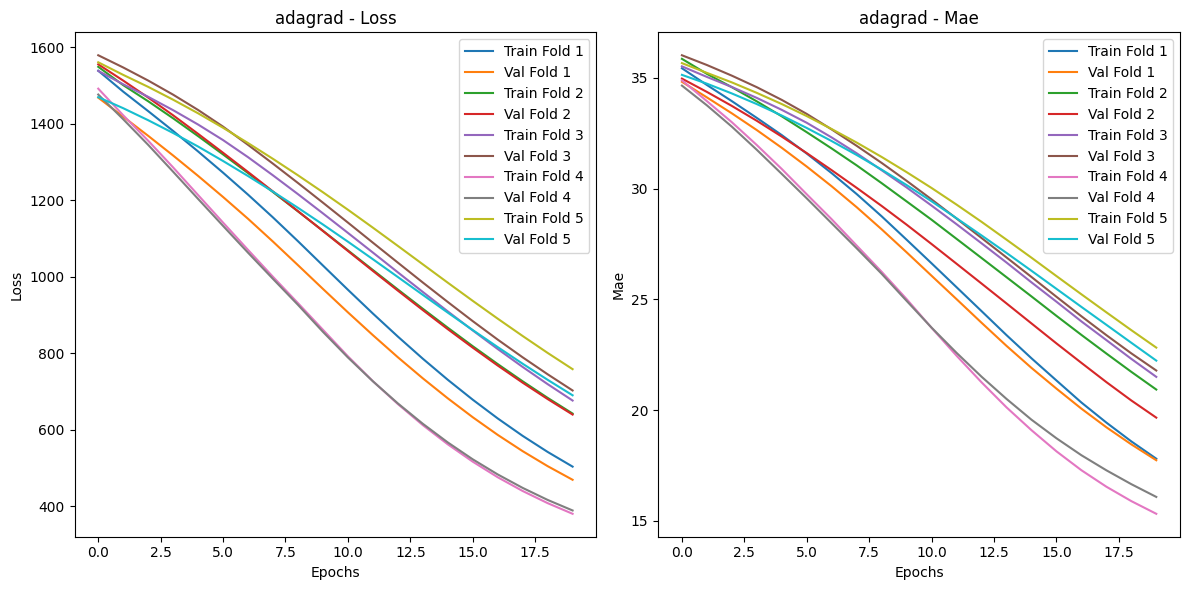


Análise estatística - Arquitetura Simples (Wine Quality):
ANOVA F-Statistic: 16.865223095178248, p-value: 3.2864198701304294e-05
Há uma diferença significativa entre os otimizadores. Realizando teste post-hoc de Tukey.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
adagrad    adam   0.2346 0.0001  0.1197 0.3494   True
adagrad rmsprop   0.2446 0.0001  0.1297 0.3594   True
adagrad     sgd    0.217 0.0003  0.1022 0.3319   True
   adam rmsprop     0.01 0.9944 -0.1049 0.1249  False
   adam     sgd  -0.0175 0.9713 -0.1324 0.0973  False
rmsprop     sgd  -0.0275 0.9012 -0.1424 0.0873  False
-----------------------------------------------------

Análise estatística - Arquitetura Moderada (Wine Quality):
ANOVA F-Statistic: 5.124100351736216, p-value: 0.011286379499820573
Há uma diferença significativa entre os otimizadores. Realizando teste post-hoc de Tukey.
 Multiple Comparison o

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Carregar o dataset Wine Quality localmente
wine_data = pd.read_csv("/home/bruno/Downloads/winequality-red.csv", delimiter=";")
X_wine = wine_data.drop("quality", axis=1).values
y_wine = wine_data["quality"].values

# Normalização dos dados
scaler_wine = StandardScaler()
X_wine = scaler_wine.fit_transform(X_wine)

# Carregar o dataset Concrete Compressive Strength localmente
concrete_data = pd.read_csv("/home/bruno/Downloads/Concrete_Data.csv")
X_concrete = concrete_data.drop("Concrete compressive strength(MPa, megapascals) ", axis=1).values
y_concrete = concrete_data["Concrete compressive strength(MPa, megapascals) "].values

# Normalização dos dados
scaler_concrete = StandardScaler()
X_concrete = scaler_concrete.fit_transform(X_concrete)

# Função para criar rede neural simples
def create_simple_nn_classification(input_shape, num_classes, optimizer):
    model = Sequential([
        Input(shape=(input_shape,)),  # Definindo a forma da entrada explicitamente
        Dense(16, activation='relu'),  # 16 neurônios na camada oculta
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_simple_nn_regression(input_shape, optimizer):
    model = Sequential([
        Input(shape=(input_shape,)),  # Definindo a forma da entrada explicitamente
        Dense(16, activation='relu'),  # 16 neurônios na camada oculta
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

# Função para criar rede neural moderada
def create_moderate_nn_classification(input_shape, num_classes, optimizer):
    model = Sequential([
        Input(shape=(input_shape,)),  # Definindo a forma da entrada explicitamente
        Dense(64, activation='relu'),  # 64 neurônios na primeira camada oculta
        Dense(32, activation='relu'),  # 32 neurônios na segunda camada
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_moderate_nn_regression(input_shape, optimizer):
    model = Sequential([
        Input(shape=(input_shape,)),  # Definindo a forma da entrada explicitamente
        Dense(64, activation='relu'),  # 64 neurônios na primeira camada oculta
        Dense(32, activation='relu'),  # 32 neurônios na segunda camada
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

# Função para criar rede neural complexa
def create_complex_nn_classification(input_shape, num_classes, optimizer):
    model = Sequential([
        Input(shape=(input_shape,)),  # Definindo a forma da entrada explicitamente
        Dense(128, activation='relu'),  # 128 neurônios na primeira camada
        Dense(64, activation='relu'),  # 64 neurônios na segunda camada
        Dense(32, activation='relu'),  # 32 neurônios na terceira camada
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_complex_nn_regression(input_shape, optimizer):
    model = Sequential([
        Input(shape=(input_shape,)),  # Definindo a forma da entrada explicitamente
        Dense(128, activation='relu'),  # 128 neurônios na primeira camada
        Dense(64, activation='relu'),  # 64 neurônios na segunda camada
        Dense(32, activation='relu'),  # 32 neurônios na terceira camada
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

# Função para treinar modelos de classificação com K-Fold
def train_kfold_classification(X, y, model_fn, optimizers, k=5):
    results = {opt: [] for opt in optimizers}
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    history_data = {opt: [] for opt in optimizers}

    for opt in optimizers:
        for train_index, test_index in kfold.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            model = model_fn(X.shape[1], y.shape[1], opt)
            history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0, validation_data=(X_test, y_test))
            history_data[opt].append(history.history)
            loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
            results[opt].append(accuracy)

    return results, history_data

# Função para treinar modelos de regressão com K-Fold
def train_kfold_regression(X, y, model_fn, optimizers, k=5):
    results = {opt: [] for opt in optimizers}
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    history_data = {opt: [] for opt in optimizers}

    for opt in optimizers:
        for train_index, test_index in kfold.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            model = model_fn(X.shape[1], opt)
            history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0, validation_data=(X_test, y_test))
            history_data[opt].append(history.history)
            loss, mae = model.evaluate(X_test, y_test, verbose=0)
            results[opt].append(mae)

    return results, history_data

# Função para plotar os gráficos de perda e métrica
def plot_training_history(history_data, metric):
    for optimizer, histories in history_data.items():
        plt.figure(figsize=(12, 6))

        for i, history in enumerate(histories):
            plt.subplot(1, 2, 1)
            plt.plot(history['loss'], label=f'Train Fold {i + 1}')
            plt.plot(history['val_loss'], label=f'Val Fold {i + 1}')
            plt.title(f'{optimizer} - Loss')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.legend()

            if metric in history:
                plt.subplot(1, 2, 2)
                plt.plot(history[metric], label=f'Train Fold {i + 1}')
                plt.plot(history[f'val_{metric}'], label=f'Val Fold {i + 1}')
                plt.title(f'{optimizer} - {metric.capitalize()}')
                plt.xlabel('Epochs')
                plt.ylabel(f'{metric.capitalize()}')
                plt.legend()

        plt.tight_layout()
        plt.show()

# Treinar e comparar diferentes otimizadores
optimizers = ['adam', 'sgd', 'rmsprop', 'adagrad']
encoder = OneHotEncoder(sparse_output=False)
y_wine_encoded = encoder.fit_transform(y_wine.reshape(-1, 1))

# Treinamento com as arquiteturas de classificação
print("Treinando com as arquiteturas de classificação:")

print("Comparando otimizadores para Wine Quality - Arquitetura Simples")
results_wine_simple, history_wine_simple = train_kfold_classification(X_wine, y_wine_encoded,
                                                                      create_simple_nn_classification, optimizers)
plot_training_history(history_wine_simple, 'accuracy')

print("Comparando otimizadores para Wine Quality - Arquitetura Moderada")
results_wine_moderate, history_wine_moderate = train_kfold_classification(X_wine, y_wine_encoded,
                                                                          create_moderate_nn_classification, optimizers)
plot_training_history(history_wine_moderate, 'accuracy')

print("Comparando otimizadores para Wine Quality - Arquitetura Complexa")
results_wine_complex, history_wine_complex = train_kfold_classification(X_wine, y_wine_encoded,
                                                                        create_complex_nn_classification, optimizers)
plot_training_history(history_wine_complex, 'accuracy')

# Treinamento com as arquiteturas de regressão
print("Treinando com as arquiteturas de regressão:")

print("Comparando otimizadores para Concrete Strength - Arquitetura Simples")
results_concrete_simple, history_concrete_simple = train_kfold_regression(X_concrete, y_concrete,
                                                                          create_simple_nn_regression, optimizers)
plot_training_history(history_concrete_simple, 'mae')

print("Comparando otimizadores para Concrete Strength - Arquitetura Moderada")
results_concrete_moderate, history_concrete_moderate = train_kfold_regression(X_concrete, y_concrete,
                                                                              create_moderate_nn_regression, optimizers)
plot_training_history(history_concrete_moderate, 'mae')

print("Comparando otimizadores para Concrete Strength - Arquitetura Complexa")
results_concrete_complex, history_concrete_complex = train_kfold_regression(X_concrete, y_concrete,
                                                                            create_complex_nn_regression, optimizers)
plot_training_history(history_concrete_complex, 'mae')

# Estatística
def statistical_comparison(results):
    all_scores = []
    optimizers = []
    for opt, scores in results.items():
        all_scores.extend(scores)
        optimizers.extend([opt] * len(scores))

    # ANOVA
    f_val, p_val = stats.f_oneway(*results.values())
    print(f"ANOVA F-Statistic: {f_val}, p-value: {p_val}")

    if p_val < 0.05:  # Se ANOVA é significativo
        print("Há uma diferença significativa entre os otimizadores. Realizando teste post-hoc de Tukey.")
        # Teste de Tukey
        tukey_results = pairwise_tukeyhsd(endog=np.array(all_scores), groups=np.array(optimizers), alpha=0.05)
        print(tukey_results)
    else:
        print("Não há diferença significativa entre os otimizadores.")

# Realizar análise estatística para classificação
print("\nAnálise estatística - Arquitetura Simples (Wine Quality):")
statistical_comparison(results_wine_simple)

print("\nAnálise estatística - Arquitetura Moderada (Wine Quality):")
statistical_comparison(results_wine_moderate)

print("\nAnálise estatística - Arquitetura Complexa (Wine Quality):")
statistical_comparison(results_wine_complex)

print("\nAnálise estatística - Arquitetura Simples (Concrete Strength):")
statistical_comparison(results_concrete_simple)

print("\nAnálise estatística - Arquitetura Moderada (Concrete Strength):")
statistical_comparison(results_concrete_moderate)

print("\nAnálise estatística - Arquitetura Complexa (Concrete Strength):")
statistical_comparison(results_concrete_complex)

### Interactive tables

Effortlessly view, navigate, sort, and filter data. Create charts and access essential data insights, including descriptive statistics and missing values – all without writing a single line of code.

### Visualization in IDE

Create graphs and visualizations that match your chosen color scheme.